<a href="https://colab.research.google.com/github/FathimathSareena/Portfolio-Project/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")

print("Path to dataset files:", path)

100%|██████████| 7.38M/7.38M [00:01<00:00, 7.32MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2


In [6]:
import os

# Print available files
print("Files in dataset folder:", os.listdir(path))


Files in dataset folder: ['online_retail.csv']


In [8]:
import pandas as pd
import os

# Get the correct file path
file_name = "online_retail.csv"  # Replace with the actual file name
file_path = os.path.join(path, file_name)

# Load dataset
df = pd.read_csv(file_path)
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["Total_Sales"] = df["Quantity"] * df["UnitPrice"]
df.dropna(inplace=True)

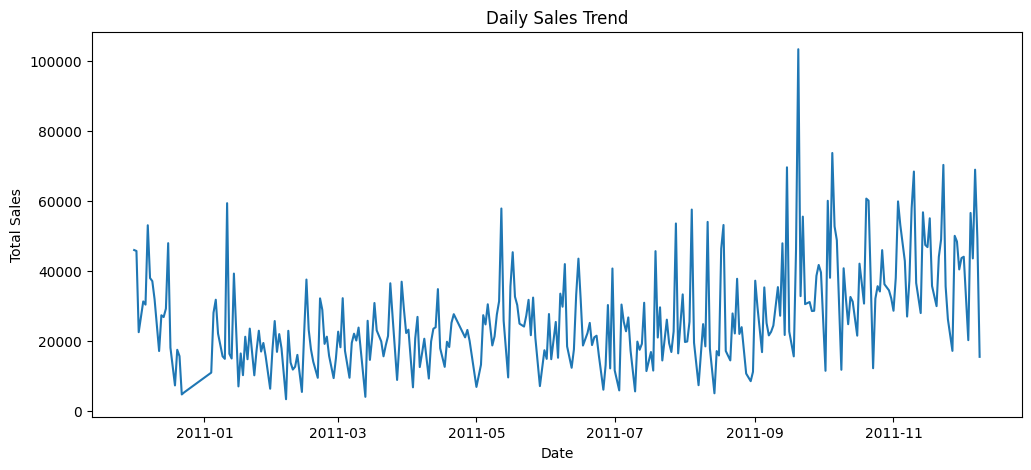

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


df.groupby(df["InvoiceDate"].dt.date)["Total_Sales"].sum().plot(figsize=(12, 5))
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

MONTHLY SALE

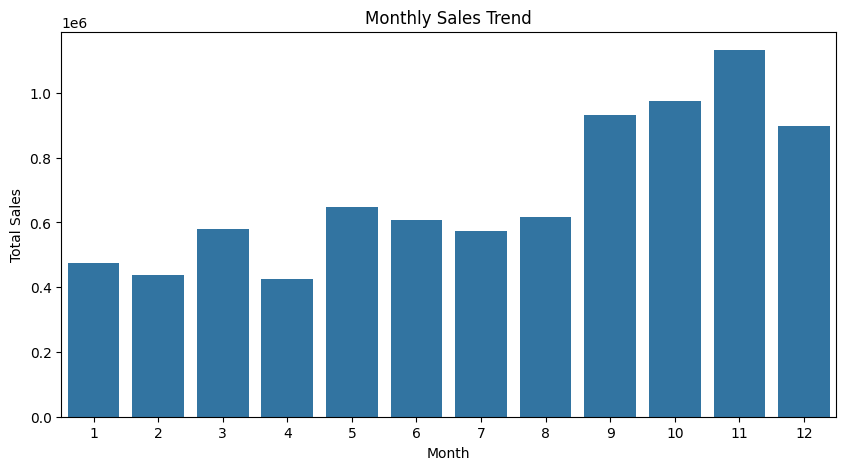

In [13]:
df["Month"] = df["InvoiceDate"].dt.month

monthluy_sales = df.groupby("Month")["Total_Sales"].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x="Month", y="Total_Sales", data=monthluy_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

REVENUE GENERATING

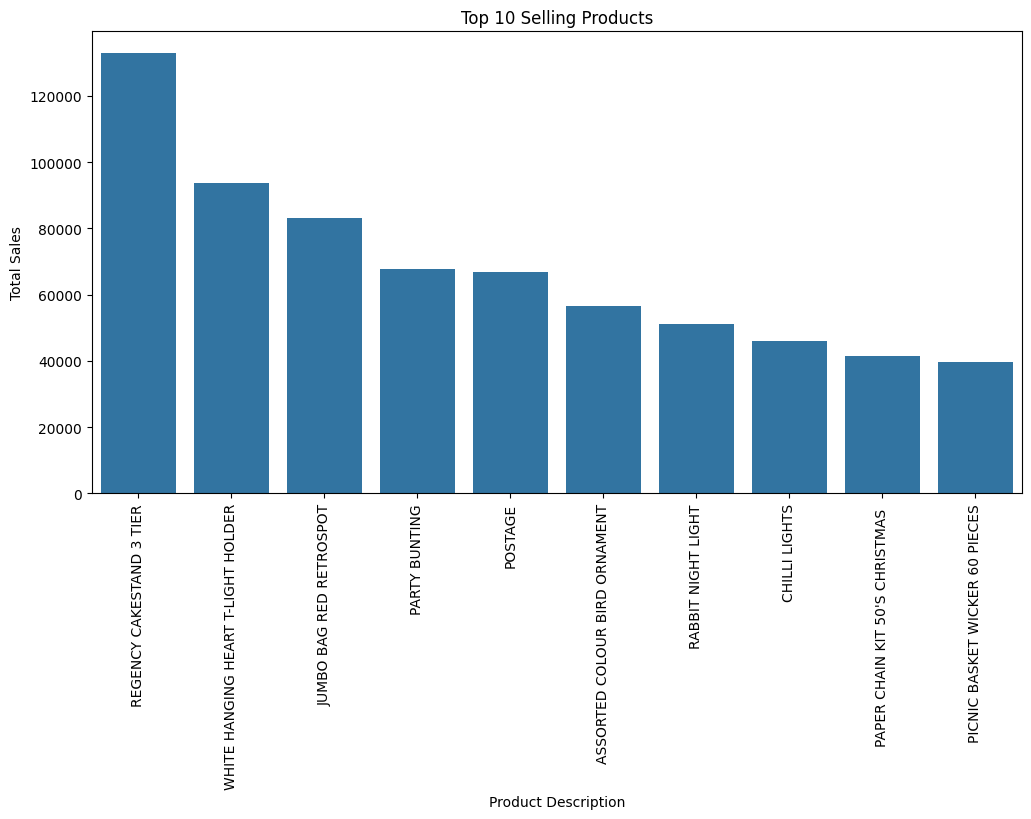

In [14]:
top_products = df.groupby("Description")["Total_Sales"].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="Description", y="Total_Sales", data=top_products)
plt.title("Top 10 Selling Products")
plt.xlabel("Product Description")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

PEAK SALE HOURS

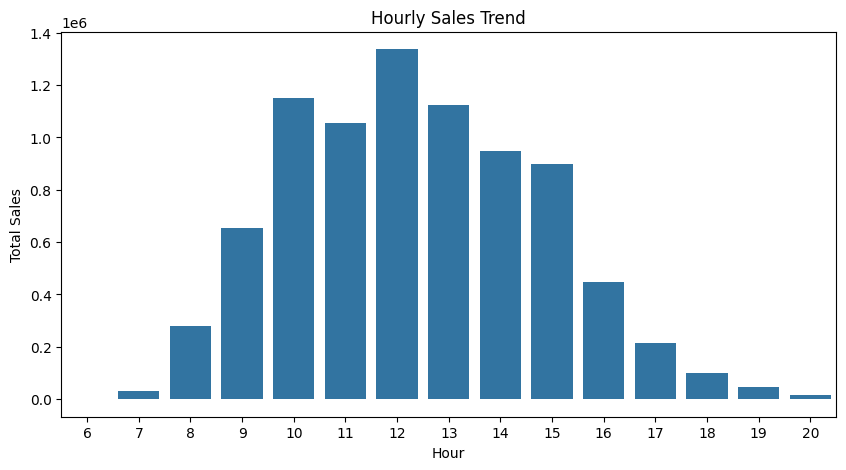

In [15]:
df["Hour"] = df['InvoiceDate'].dt.hour
hourly_sales = df.groupby("Hour")["Total_Sales"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x="Hour", y="Total_Sales", data=hourly_sales)
plt.title("Hourly Sales Trend")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()